# Binning / Discretization 

In [4]:
# https://pypi.org/project/mglearn/
# Dataset wave from mglearn library is being used for this session
#!pip install mglearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import mglearn
X, y = mglearn.datasets.make_wave(n_samples=40)   #This data has only one independent column. Easier to explain concepts
print(X.shape)
print(y.shape)

(40, 1)
(40,)


In [5]:
print('X values :\n',pd.DataFrame(X).head())
print('y values :\n',pd.DataFrame(y).head())

X values :
           0
0 -0.752759
1  2.704286
2  1.391964
3  0.591951
4 -2.063888
y values :
           0
0 -0.448221
1  0.331226
2  0.779321
3  0.034979
4 -1.387736


In [6]:
from sklearn.linear_model import LinearRegression   

In [8]:
X , y = mglearn.datasets.make_wave(n_samples=120)
linreg = LinearRegression().fit(X,y)

In [15]:
## Generate Dummy X to plot the Linear Regression Fit Line

# generate list of 1000 numbers from -3 upto 3 but not including 3 
# and then converts the list to array of numbers
line = np.linspace(-3, 3 , 1000, endpoint = False) 
line = line.reshape(-1,1) 
linpredicted = linreg.predict(line)

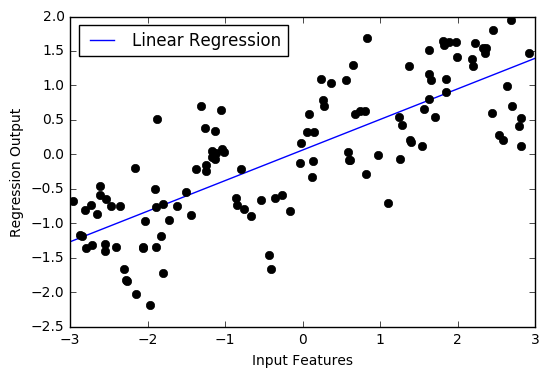

In [16]:
plt.plot(line, linpredicted, label = "Linear Regression" )
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc = 'best')

In [17]:
print(linreg.score(X, y))

0.626336349983


In [11]:
# In case we have to use linear models, we can make them more powerful by changing the data representation 
# one way to make linear models more powerful is binning the data

In [21]:
# Let us do the binning with onehot coding. 
# A given input belongs to one bin and not others. Hence, we can onehot code them
kb = KBinsDiscretizer( n_bins = 10, strategy ='uniform', encode ='onehot-dense') 
kb.fit(X) 
X_binned = kb.transform(X)

In [22]:
X_binned[0:10]

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

In [23]:
# bin the input line data too which is our test data

line_binned = kb.transform(line)


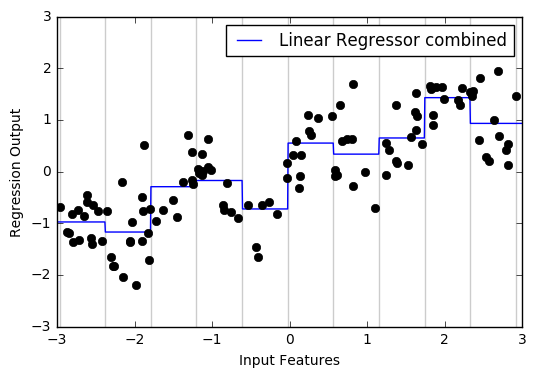

In [24]:
linreg = LinearRegression().fit(X_binned, y)
predicted = linreg.predict(line_binned)
plt.plot(line, predicted, label = 'Linear Regressor combined')



plt.plot(X[:,0], y, 'o', c='k')       # plotting origial X Vs y. The slope of line may not match coeff
plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc = 'best')

In [25]:
# X_Binned Model Performance
print(linreg.score(X_binned, y))


0.723730972817


In [261]:
# Comparing the linear models before binning and after binning, 
# we can see that the linear model has become more flexible.

In [26]:
print("coefficients for each bin \n", linreg.coef_ ) #coefficients for each bin.
print("")
print("intercept\n", linreg.intercept_)

coefficients for each bin 
 [-1.03201943 -1.22695979 -0.34954264 -0.2295748  -0.78029033  0.49470868
  0.28071025  0.59355014  1.37382361  0.8755943 ]

intercept
 0.0554426035582


# Adding slope to the linear model in a bin

In [27]:
X_combined = np.hstack([X, X_binned])
line_combined = np.hstack([line, line_binned])
X_combined[0:10]

array([[-0.75275929,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.70428584,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.39196365,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.59195091,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06388816,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06403288,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.   

In [28]:
print('X_Combined shape :', X_combined.shape)  #from 10 onehotcoded columns, it has become 11

X_Combined shape : (120, 11)


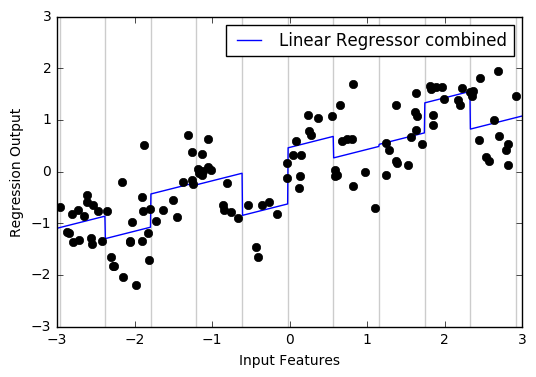

In [29]:
linreg = LinearRegression().fit(X_combined, y)
predicted = linreg.predict(line_combined)
plt.plot(line, predicted, label = 'Linear Regressor combined')


plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc = 'best')

In [30]:
# linear regression model now has learnt a slope but the slope is same in all the bins (blue line)

In [31]:
print("coefficients for each bin \n", linreg.coef_ ) #coefficients for each bin.
print("")
print("intercept\n", linreg.intercept_)

coefficients for each bin 
 [ 0.37891039 -0.02879907 -0.46519195  0.17621386  0.13142368 -0.68549904
  0.39882373 -0.01863165  0.02106605  0.6006746  -0.13008021]

intercept
 0.0665722481943


In [32]:
print(linreg.score(X_combined, y))

0.727757151257


## Interaction Feature

In [33]:
# Let us create an interaction feature by using simple multiple operation 

In [34]:
X_product = np.hstack([X_binned, X_binned * X])


print(X_product.shape)

line_product = np.hstack([line_binned, line_binned * line])



(120, 20)


In [35]:
print(X_binned[1])
print(X[1])
print(X_binned[1] * X[1])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 2.70428584]
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          2.70428584]


In [36]:
X_product[0]

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.75275929, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

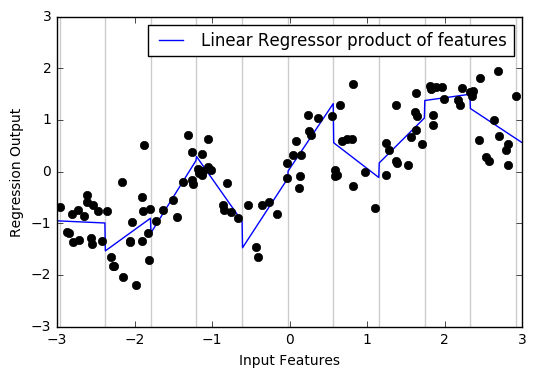

In [37]:
linreg = LinearRegression().fit(X_product, y)
predicted = linreg.predict(line_product)
plt.plot(line, predicted, label = 'Linear Regressor product of features')



plt.plot(X[:,0], y, 'o', c='k')    # Note: we are plotting original X Vs Y, hence the model slope may not reflect coeff
plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc = 'best')

In [38]:
# Each bin has it's own offset and its own coefficient.

In [39]:
# Each bin has it's own offset and coefficient

print("coefficients for each bin \n", linreg.coef_ ) #coefficients for each bin.
print("")
print("intercept\n", linreg.intercept_)

coefficients for each bin 
 [-1.64806752  0.55094869  2.63066389 -2.75832344 -0.57192192 -0.44136044
  0.72411153 -2.04973825  0.52299325  3.04069421 -0.06780242  1.0846453
  2.40997624 -2.13237714  2.29987211  2.24215658 -1.15422223  1.49089011
  0.20699844 -0.99043343]

intercept
 0.489982394296


In [40]:
print(linreg.score(X_product, y))

0.78728708933


# Polynomial feature transformation 

In [46]:
from sklearn.preprocessing import PolynomialFeatures


In [47]:
poly = PolynomialFeatures(degree=15, include_bias=False)

In [48]:
poly.fit(X)

PolynomialFeatures(degree=15, include_bias=False, interaction_only=False)

In [49]:
X_poly = poly.transform(X)

line_poly = poly.transform(line)

In [50]:
print("X_poly shape: ", X_poly.shape)

X_poly shape:  (120, 15)


In [51]:
# Let us see the difference in the X and X_poly entries

print("Records in X \n", X[0])
print("Records in X_poly \n",X_poly[0])

Records in X 
 [-0.75275929]
Records in X_poly 
 [-0.75275929  0.56664654 -0.42654845  0.32108831 -0.2417022   0.18194358
 -0.13695972  0.1030977  -0.07760775  0.05841996 -0.04397616  0.03310347
 -0.02491894  0.01875796 -0.01412023]


In [52]:
# the columns are x, x^2, x ^3

print("X_Poly feature names : " , poly.get_feature_names())

X_Poly feature names :  ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15']


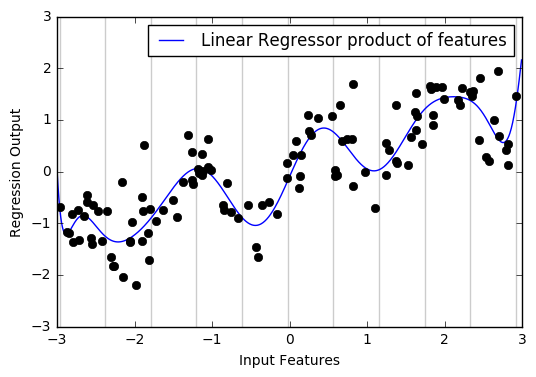

In [53]:
linreg = LinearRegression().fit(X_poly, y)
predicted = linreg.predict(line_poly)
plt.plot(line, predicted, label = 'Linear Regressor product of features')


plt.plot(X[:,0], y, 'o', c='k')    # Note: we are plotting original X Vs Y, hence the model slope may not reflect coeff
plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc = 'best')

In [54]:
print(linreg.score(X_poly, y))

0.788350395746
